![](../../lectures/img/511_banner.png)

# Lab 2: Tests, Classes, Style & Imports

**Tomas Beuzen, September 2020**

|||
|---|---|
|**IMPORTANT:<br>This is a group lab - you will complete this lab with your assigned partner(s).<br>You will share a single GitHub repository which you can all push to.<br>Only one person in the group needs to submit to Canvas.**|![](img/we_got_this.png)|

**Please add a link to your GitHub repository here:**

In this lab, you'll complete various exercises related to Python functions, tests, classes, & imports. This lab will help you write better functions in Python, build classes and subclasses, and write tests. The assignment is based on the task of simulating stock prices over time. Note that there are 9 Exercises, but only 6 are required. Only some Exercises are provided with tests for you to test your solutions. The final question of this lab is tough but is good practice for using Python classes!

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1:-Geometric-Brownian-Motion" data-toc-modified-id="Exercise-1:-Geometric-Brownian-Motion-2">Exercise 1: Geometric Brownian Motion</a></span></li><li><span><a href="#Exercise-2:-Stock-Options" data-toc-modified-id="Exercise-2:-Stock-Options-3">Exercise 2: Stock Options</a></span></li><li><span><a href="#Exercise-3:-Option-Value-via-Monte-Carlo-Simulation" data-toc-modified-id="Exercise-3:-Option-Value-via-Monte-Carlo-Simulation-4">Exercise 3: Option Value via Monte Carlo Simulation</a></span></li><li><span><a href="#(OPTIONAL)-Exercise-4:-Black-Scholes" data-toc-modified-id="(OPTIONAL)-Exercise-4:-Black-Scholes-5">(OPTIONAL) Exercise 4: Black-Scholes</a></span></li><li><span><a href="#(OPTIONAL)-Exercise-5:-Theory-vs.-Practice" data-toc-modified-id="(OPTIONAL)-Exercise-5:-Theory-vs.-Practice-6">(OPTIONAL) Exercise 5: Theory vs. Practice</a></span></li><li><span><a href="#(OPTIONAL)-Exercise-6:-Smoothing-a-Curve" data-toc-modified-id="(OPTIONAL)-Exercise-6:-Smoothing-a-Curve-7">(OPTIONAL) Exercise 6: Smoothing a Curve</a></span></li><li><span><a href="#Exercise-7:-Putting-it-all-Together-with-Classes" data-toc-modified-id="Exercise-7:-Putting-it-all-Together-with-Classes-8">Exercise 7: Putting it all Together with Classes</a></span></li><li><span><a href="#Exercise-8:-Creating-a-Stock-Subclass" data-toc-modified-id="Exercise-8:-Creating-a-Stock-Subclass-9">Exercise 8: Creating a Stock Subclass</a></span></li><li><span><a href="#Exercise-9:-Creating-a-Portfolio" data-toc-modified-id="Exercise-9:-Creating-a-Portfolio-10">Exercise 9: Creating a Portfolio</a></span></li><li><span><a href="#Run-Autograding" data-toc-modified-id="Run-Autograding-11">Run Autograding</a></span></li><li><span><a href="#Submission-to-Canvas" data-toc-modified-id="Submission-to-Canvas-12">Submission to Canvas</a></span></li></ul></div>

In [1]:
# Run this cell. These are imports we'll need for this lab
import math
from random import gauss
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # These lines are to do with plot formatting. We'll talk about them in a later lecture.
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

## Exercise 1: Geometric Brownian Motion
<hr>

rubric={autograde:2}

We will simulate a stock's price fluctuation over time by assuming the stock price follows a [_geometric Brownian motion_](https://en.wikipedia.org/wiki/Geometric_Brownian_motion). In Lab 1 you simulated a random walk which is essentially Brownian motion: at each time step you add a small random amount to your current position. In geometric Brownian motion, at each time step you _multiply_ your current state by a (positive) random amount. Note that in regular Brownian motion the position can be both positive or negative, but in geometric Brownian motion the position is always positive; this is good because stock prices are never negative. An example is shown in the figure below:

![](img/stock.png)

In our model of stock prices, the current price $S_t$ depends on the previous price $S_{t-1}$ as follows:

$$
S_t = S_{t-1} \exp \left( -0.5\sigma^2 + \sigma Z \right)
$$

where $Z$ is a random number drawn from a standard [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution). You can generate these random draws with `gauss(0, 1)` (which we imported from the `random` module at the start of the lab). Python comes with a built-in module called `math` (which we imported at the start of the lab with `import math`). `math` contains a variety of useful math operations such as `math.exp()`, `math.sqrt()`, `math.log()`, and `math.pow()`, which you may use throughout this lab.

The parameter $\sigma$ is the _volatility_ of the stock. The volatility is analogous to the step size in a random walk: a larger volatility means more movement in a given amount of time. (Note that if $\sigma=0$ then the stock price never changes, whereas if $\sigma$ is large the stock price can change wildly). The figure above  was generated using $S_0=10$, $\sigma=0.01$, and $T=1000$.

**Your tasks**
<hr>

1. Write a function `simulate(S0, σ, T)` that takes as arguments $S_0$, $\sigma$, and $T$, that simulates the geometric Brownian motion for $T$ steps using the equation above, and then returns an array of size $T+1$ containing the stock price at each time step;
2. You should write a docstring for your function.
3. You are given some plotting code to test out your function.

*Hints:*
- *Start by initializing an empty list and then appending to it with a `for` loop.*
- *Use `gauss(0, 1)` for $Z$, use `math.exp()` for $exp()$.*
- *When writing your tests, it might be easiest to think about the scenarios that would not be random...*
- *Do not use the NumPy library here (if you are already familiar with it) - we'll be doing that next lab.*

In [2]:
def simulate(S0, σ, T):
    pass  # remove this line if providing a solution
# Your answer goes here.

There was an error plotting your function output.


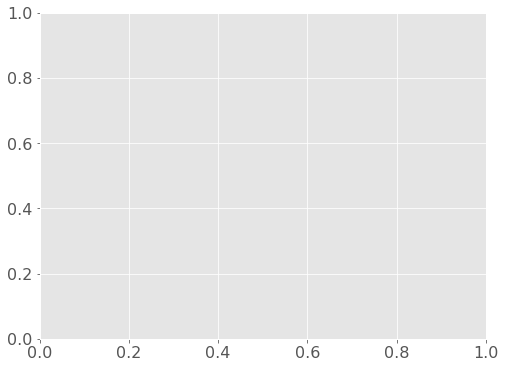

In [3]:
# Code you can use for plotting your function
try:
    trace = simulate(10, 0.01, 1000)
    plt.plot(trace)
    plt.xlabel("Time")
    plt.ylabel("Stock price ($)");
except:
    print("There was an error plotting your function output.")

## Exercise 2: Stock Options
<hr>

rubric={accuracy:2,quality:2}

A _stock option_ or [_call option_](https://en.wikipedia.org/wiki/Call_option) is a promise that you will be allowed (but not obligated) to buy a certain stock for a certain price at a certain time. For example, I might have a stock option for 1 Google share with a _strike price_ of $500 and an _expiration date_ of one year from now. This means that, if I want to, I have the option to buy 1 Google share for $500 in one year. 

So, under what circumstances would I want to do that? Well, if the Google stock price one year from now is $400, then I certainly would not want to exercise my option to pay $500 when I could be paying $400 for the same thing! Therefore, we say that the option turned out to be worthless if the share price is below the strike price at the expiration date of the option.

On the other hand, if the Google share price turned out to be $600 one year from now, then I'm in luck: by exercising my option to buy a share for $500, and then immediately selling it at the market price of $600, I have made a profit of $100. A representation of what we just said in mathematical symbols is that, at the expiration time $T$, the option's profit $P_T$ is a function of the strike price $X$ (defined at time $T$) and **the stock price at the expiration date $S_T$** given by

$$
P_T=\max(0, S_T-X)
$$

Ponder this for a moment and make sure you understand how the math corresponds with the explanation above (*note: we are using the word profit a bit loosely; in reality, you would need to pay for the option in the first place. In general, please forgive any financial misdemeanors here*).

**Your tasks**
<hr>

1. Write a function `option_profit(S, X)` that takes in a list of a simulated stock trace (i.e., $S$, the output of `simulate(S0, σ, T)` from Exercise 1), and an option strike price $X$, and returns the option's profit using the formula above (note that $S_T$ represents the end of the time series, which is what we want to compare $X$);
2. You must also write at least two tests for your function.
3. Write a docstring for your function.

In [4]:
def option_profit():
    pass  # remove this line if providing a solution
# Your answer goes here.

## Exercise 3: Option Value via Monte Carlo Simulation
<hr>

rubric={accuracy:3,quality:2}

An important question that arises is, what is an option's fair value at the time it is issued ($t=0$), **before** we know what is going to happen to the stock price? To use our previous example, if Google shares currently trade at $500, how much would you pay for an option to buy it for $500 in one year? Or $600 in one year? Or $600 in two years? Indeed, the option value will depend on the strike price and the duration, among other things.

Although the problem of valuing an option has been addressed theoretically (see Exercise 4), we will estimate it empirically by simulating the stock price with `simulate(S0, σ, T)`, and then computing the option profit $P_T$ with `option_profit(S, X)`. Sometimes the simulation will yield a worthless option (because the stock price is below the strike price), and other times it will be worth something (because the stock price is above the strike price). By repeating the simulation many times and taking the average, we can compute an "expected" or average value of the option, which we will take to be its fair value ($P_0$). This general approach of simulating a random process in order to understand its characteristics is called a [_Monte Carlo method_](https://en.wikipedia.org/wiki/Monte_Carlo_method).

**Your tasks**
<hr>

1. Write a function `option_value_monte_carlo()` that takes as arguments $S_0$, $\sigma$, $T$, $X$, and the number of simulations $N$, and returns the average option value (averaged over the $N$ simulations). You can specify $N$ as a keyword argument, with a default value of $100$;
2. Your function should make use of `simulate()` and `option_profit()`;
3. You must also write at least two tests for your function.
4. Write a docstring for your function.

*Hint: to find the mean of a list you can calculate the `sum()` and divide by the `len()`.*

In [5]:
def option_value_monte_carlo():
    pass  # remove this line if providing a solution
# Your answer goes here.

## (OPTIONAL) Exercise 4: Black-Scholes
<hr>

rubric={accuracy:1}

The famous [Black-Scholes formula](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model) was derived by a theoretical analysis of the geometric Brownian motion model discussed above. It turns out that (in our oversimplified case of zero interest rate) the expected option price, $P_0$, is given by:

$$P_0 = \Phi(d_1)S_0 -\Phi(d_2)X $$

where

$$d_1 = \frac{1}{\sigma \sqrt{T}} \left[ \log \left(\frac{S_0}{X} \right) + \frac{\sigma^2}{2}T\right]$$ 

and

$$d_2 = \frac{1}{\sigma \sqrt{T}} \left[ \log \left(\frac{S_0}{X} \right) - \frac{\sigma^2}{2}T\right] $$

and $\Phi(\cdot)$ is the cumulative distribution function of the Gaussian distribution, which can be computed with `scipy.stats.norm.cdf(x)`. Note: unless otherwise specified, $\log$ refers to the natural logarithm.

Your task: write a function `black_scholes` that takes as arguments $S_0$, $\sigma$, $T$, and $X$, and returns the Black-Scholes option price given by the equation above. You must also write at least two tests for your function. 

**Your tasks**
<hr>

- Write a function `black_scholes(S0, σ, T, X)` that takes as arguments $S_0$, $\sigma$, $T$, and $X$, and returns the Black-Scholes option price given by the equation above;
- You must also write at least two tests for your function.
- And don't forget to write a docstring!

*Hints:*
- *$\Phi(\cdot)$ can be calculated using `scipy.stats.norm.cdf(x)` (we imported `scipy.stats` at the start of this lab)*;
- *Remember that the `math` module contains useful functions like `math.sqrt()`, `math.log()`, and `math.pow()`, some of which you'll need here. While operations like square root can be perform using `**` notation, e.g., `4 ** 0.5`, I still sometimes use the `math` functions because they can make my code more readable/[slightly faster](https://stackoverflow.com/questions/327002/which-is-faster-in-python-x-5-or-math-sqrtx).*

In [6]:
def black_scholes():
    pass  # remove this line if providing a solution
# Your answer goes here.

## (OPTIONAL) Exercise 5: Theory vs. Practice
<hr>

rubric={reasoning:1}

Compare your theoretical results from Exercise 4 with your empirical results from Exercise 3 - do they agree?

In [7]:
# Your answer goes here.

## (OPTIONAL) Exercise 6: Smoothing a Curve
<hr>

rubric={accuracy:1}

Your simulation from Exercise 1 shows the stock price at every time step, and is therefore very "bumpy". Investors are often more interested in a _smoothed_ depiction of the stock price over time, in which small ups and downs are removed, leaving only the salient trends. The figure below shows a smoothed stock price in red, generated using a moving average window with $W=25$:

![](img/stock_smooth.png)

The smoothing is achieved by replacing the price at time $t$ with an average of all the prices from times $t-W$ to $t+W$ (inclusive), for some positive integer $W$ (thus, the total width of the window is $2W+1$). There are various options for dealing with the edges of the plot, here we will assume that when we do not have enough data for the entire window, the average is computed only over the portion of the window that is within the data range. For example, if $T=1000$ and $W=5$ then the smoothed curve at $t=0$ is the average of the prices from $t=0$ to $t=5$, the smoothed curve at $t=1$ is the average of the prices from $t=0$ to $t=6$, the smoothed curve at $t=10$ is the average of the prices from $t=5$ to $t=15$, and the smoothed curve at $t=997$ is the average of the prices from $t=992$ to $t=1000$.

**Your tasks**
<hr>

1. Write a function `smooth` that takes in an array of values (such as the output of `simulate`) and the window width $W$, and returns a smoothed version the input array using the sliding window averaging scheme described above. Set the default value of $W$ to $25$. The returned array should be the same size as the input array.;
2. You must also write at least two tests for your function.
3. And don't forget to write a docstring!

*Hint: start by initializing a numpy array and then fill it in using a loop. At each iteration of the loop, compute the two ends of the window, taking into account the special cases if you are near the edge of the array. Then, you can slice the input array to take only the values in the window, and finally you can take the mean of these with `np.mean`.*

In [8]:
def smooth():
    pass  # remove this line if providing a solution
# Your answer goes here.

In [9]:
# Code you can use for plotting your function 
try:
    trace = simulate(1, 0.01, 1000)
    trace_smooth = smooth(trace, 30)
    plt.plot(trace, label="Original")
    plt.plot(trace_smooth, lw=3, label="Smoothed")
    plt.xlabel("Time")
    plt.ylabel("Stock price ($)")
    plt.legend();
except:
    print("There was an error plotting your function output.")

There was an error plotting your function output.


## Exercise 7: Putting it all Together with Classes
<hr>

rubric={autograde:2}

Let's create a class to represent geometric Brownian motion. Below is the skeleton of a class `Brownian`. The constructor takes in two arguments, `price` (initial price) and `σ` (volatility) and should store these as instance attributes.

**Your tasks**
<hr>

1. Complete the constructor method `__init__`;
2. Write a method called `simulate()`, which takes in the number of time steps $T$ with a default value of 100, simulates the geometric Brownian motion for  $T$  steps, and returns a list of the simulated time series. It is fine to copy/paste a bunch of the code from the Exercises above.
3. Be sure to write a docstring for your class and method.

In [10]:
class Brownian:
    """Geometric Brownian motion.

    Parameters
    ----------
    price : float
        the initial stock price
    σ : float
        stock volatility, should be non-negative

    Examples
    --------
    >>> b = Brownian(1, 0.1)
    """

    def __init__(self, price, σ):
        """See help(Brownian)"""
        pass  # remove this line if providing a solution

# Your answer goes here.

## Exercise 8: Creating a Stock Subclass
<hr>

rubric={accuracy:2,quality:2}

Our `Brownian` class above is the perfect foundation for us to create a `Stock` subclass that inherits attributes/methods of `Brownian` but also adds some more stock-specific functionality.

**Your tasks**
<hr>

1. Create a new class call `Stock` that **inherits** everything from the `Brownian` class from Exercise 7, but also has a `name` instance attribute which holds the name of the stock;
2. Write a method called `simulate_price()`, which takes in the number of time steps $T$ and a keyword argument $N$ with a default value of 100, and uses Monte Carlo to estimate the stock price **after** $T$ time steps, averaged over $N$ trials and returns the result. Your method should _not_ modify `self.price` (*hint: your class is inheriting the `simulate()` code from `Brownian` which you can use with `self.simulate()`*).
3. Be sure to write a docstring for your class and method.

In [11]:
class Stock(Brownian):
    """A stock that is traded on the stock market.

    Parameters
    ----------
    price : float
        the initial stock price
    σ : float
        stock volatility, should be non-negative
    name : str
        stock name

    Examples
    --------
    >>> disney = Stock(550.0, 0.25, "DIS")
    """

    def __init__(self, price, σ, name):
        """See help(Stock)"""
        pass  # remove this line if providing a solution
    
# Your answer goes here.

## Exercise 9: Creating a Portfolio
<hr>

rubric={accuracy:3,quality:3}

Inheritance is a tricky subject so we're going to go through one more exercise for practice. This is definitely the hardest question of this lab, but should teach you some good Python skills! Only a bit of helper code is provided here, but I've provided some tests so that you can test whether your code is working as it should.

The file `wallet.py` provided with your lab contains a basic class called `Wallet` that stores a cash balance and provides methods to `buy_item()` and `sell_item()`. We created this class together in Lecture 4.

**Your tasks**
<hr>

Your task here is to build a new `Portfolio` class that inherits from `Wallet` and has the following:

1. Overwrites the `item` class attribute with the value `"Portfolio"` (rather than `"Wallet"`);
2. An instance attribute called `stocks_owned` which initializes as `Counter()` (I've done this for you in the starter code below). We did not cover `Counter()` in class but it's an easy way to keep track of your stocks. Its docs are [here](https://docs.python.org/3/library/collections.html#collections.Counter), but all you need to know is that it keeps count of any object you pass it (like a `Stock`), for example:

```python
c = Counter()
apple = Stock(200, 0.1, "AAPL")
c[apple] = 5
c[apple]
5
c[apple] += 2
c[apple]
7
```
3. A method `buy_stock`, which takes in a `stock` instance and the number of stocks to buy. Bought stock should be added to the `stocks_owned` counter with `self.stocks_owned[stock] += number`. If you don't have enough money to buy the `number` of `stock` you want, a `InsufficientCashError` should be raised (this is already built-in to `Wallet.buy_item()` for you!).
4. A method `sell_stock`, which takes in a `Stock` instance and the number of stocks to sell. Sold stock should be removed from the `stocks_owned` counter with `self.stocks_owned[stock] -= number`. If you don't have enough `stock` to sell, a `InsufficientStockError` (I've made this for you).
4. A method `portfolio_value()`, which computes the current value of your portfolio, _including your cash_.
5. A method `simulated_portfolio_value()`, which computes the value of your portfolio, _including your cash_, after time $T$ (make use of `stock.simulate_price()` to do this!)

In [12]:
from wallet import Wallet, InsufficientCashError
from collections import Counter

class InsufficientStockError(Exception):
    pass


class Portfolio(Wallet):
    """An investment portfolio consisting of Stocks and cash."""

    def __init__(self, balance):
        super().__init__(balance)
        self.stocks_owned = Counter()
        
# Your answer goes here.

![](img/good_stuff.png)